# 1. Sample Data and Stacking Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

### 1.1 Data

In [2]:
from sklearn.datasets import make_classification

data, label = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2021)

In [3]:
data.shape, label.shape

((1000, 20), (1000,))

### 1.2 EDA

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

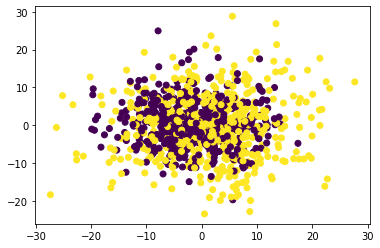

In [5]:
pca_data = pca.fit_transform(data)
plt.scatter(pca_data[:,0], pca_data[:,1], c=label)

### 1.3 Split

In [6]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
    data, label, train_size=0.7, random_state=2021)

# 2. Performance of Individual Models
- LR
- KNN
- DT
- SVM
- BAYES

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [8]:
models = {
    'lr': LogisticRegression(),
    'knn': KNeighborsClassifier(),
    'tree': DecisionTreeClassifier(),
    'svm': SVC(),
    'bayes': GaussianNB(),
}

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [10]:
names = []
results = []
for name, model in models.items():
    result = cross_val_score(model, train_data, train_label, cv=3, scoring="accuracy")
    names += [name]
    results += [result]

In [11]:
results

[array([0.79487179, 0.74678112, 0.81545064]),
 array([0.88888889, 0.90128755, 0.86266094]),
 array([0.75213675, 0.78111588, 0.74248927]),
 array([0.91025641, 0.89270386, 0.9055794 ]),
 array([0.75213675, 0.76824034, 0.77253219])]

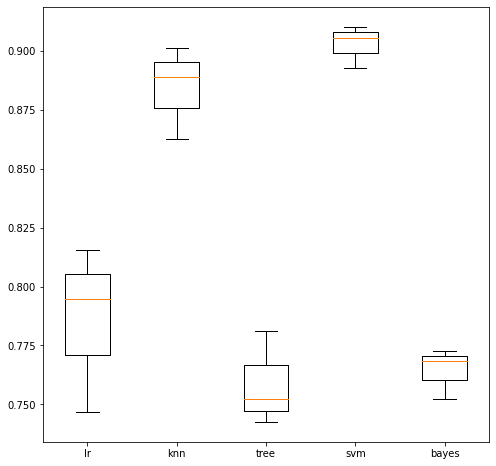

In [12]:
plt.figure(figsize=(8, 8))
plt.boxplot(results, labels=names)
plt.show()

In [13]:
for name, model in models.items():
    model.fit(train_data, train_label)
    test_pred = model.predict(test_data)
    acc = accuracy_score(test_label, test_pred)
    print(f"Model {name} test accuracy is {acc:.4}")

Model lr test accuracy is 0.7833
Model knn test accuracy is 0.8633
Model tree test accuracy is 0.79
Model svm test accuracy is 0.9167
Model bayes test accuracy is 0.78


# 3. Stacking

In [14]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

models.keys()

dict_keys(['lr', 'knn', 'tree', 'svm', 'bayes'])

In [15]:
stacking = StackingClassifier(
    estimators=list(models.items()),
    final_estimator=LogisticRegression(),
    cv=3)

In [16]:
stacking_result = cross_val_score(stacking, train_data, train_label, cv=3, scoring="accuracy")
stacking_result

array([0.9017094 , 0.91845494, 0.88841202])

In [17]:
all_result = []
all_result.extend(results)
all_result.append(stacking_result)

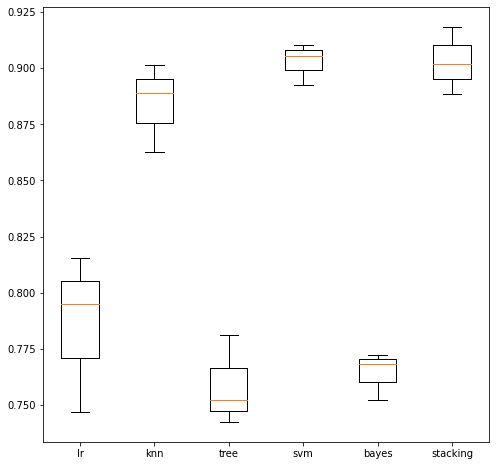

In [18]:
plt.figure(figsize=(8, 8))
plt.boxplot(all_result, labels=names + ["stacking"])
plt.show()

In [19]:
for name, model in models.items():
    test_pred = model.predict(test_data)
    acc = accuracy_score(test_label, test_pred)
    print(f"Model {name} test accuracy is {acc:.4}")

stacking.fit(train_data, train_label)
stacking_pred = stacking.predict(test_data)
stacking_acc = accuracy_score(test_label, stacking_pred)
print(f"Model stacking test accuracy is {stacking_acc:.4}")

Model lr test accuracy is 0.7833
Model knn test accuracy is 0.8633
Model tree test accuracy is 0.79
Model svm test accuracy is 0.9167
Model bayes test accuracy is 0.78
Model stacking test accuracy is 0.9233
